# Project ML

In [49]:
import pandas as pd  

In [50]:
df = pd.read_csv('/Users/winstonbudihartono/Desktop/MY-DAC-Curriculum/Internal Project/cleaned_file.csv')

## Machine Learning

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree

In [53]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [54]:
# Combine "Normal" and "Abnormal" into a new category "Evaluated"
df['Test Results'] = df['Test Results'].replace({'Normal': 'Evaluated', 'Abnormal': 'Evaluated'})

# Display the updated column to verify the changes
df['Test Results'].value_counts()

Test Results
Evaluated       36768
Inconclusive    18198
Name: count, dtype: int64

In [55]:
label_encoder = LabelEncoder()

# Apply Label Encoding to all object type columns in the dataset
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                        Name       Age    Gender  Blood Type  \
Name                1.000000  0.001151  0.007992   -0.001075   
Age                 0.001151  1.000000 -0.002510   -0.000031   
Gender              0.007992 -0.002510  1.000000   -0.000690   
Blood Type         -0.001075 -0.000031 -0.000690    1.000000   
Medical Condition   0.003250 -0.002800  0.000746   -0.004183   
Date of Admission   0.003662 -0.000877  0.001649   -0.000147   
Doctor             -0.005099 -0.003225 -0.002916   -0.004764   
Hospital            0.003629  0.001728  0.003262   -0.000457   
Insurance Provider -0.001197 -0.005222 -0.003267   -0.001097   
Billing Amount     -0.001584 -0.003427  0.004939   -0.000575   
Room Number        -0.001004 -0.000352 -0.006764    0.004465   
Admission Type      0.004086  0.004098  0.009642   -0.004305   
Discharge Date      0.003678 -0.000748  0.001718   -0.000175   
Medication          0.000286 -0.006073  0.007855    0.002778   
Test Results        0.008979  0.004450 -

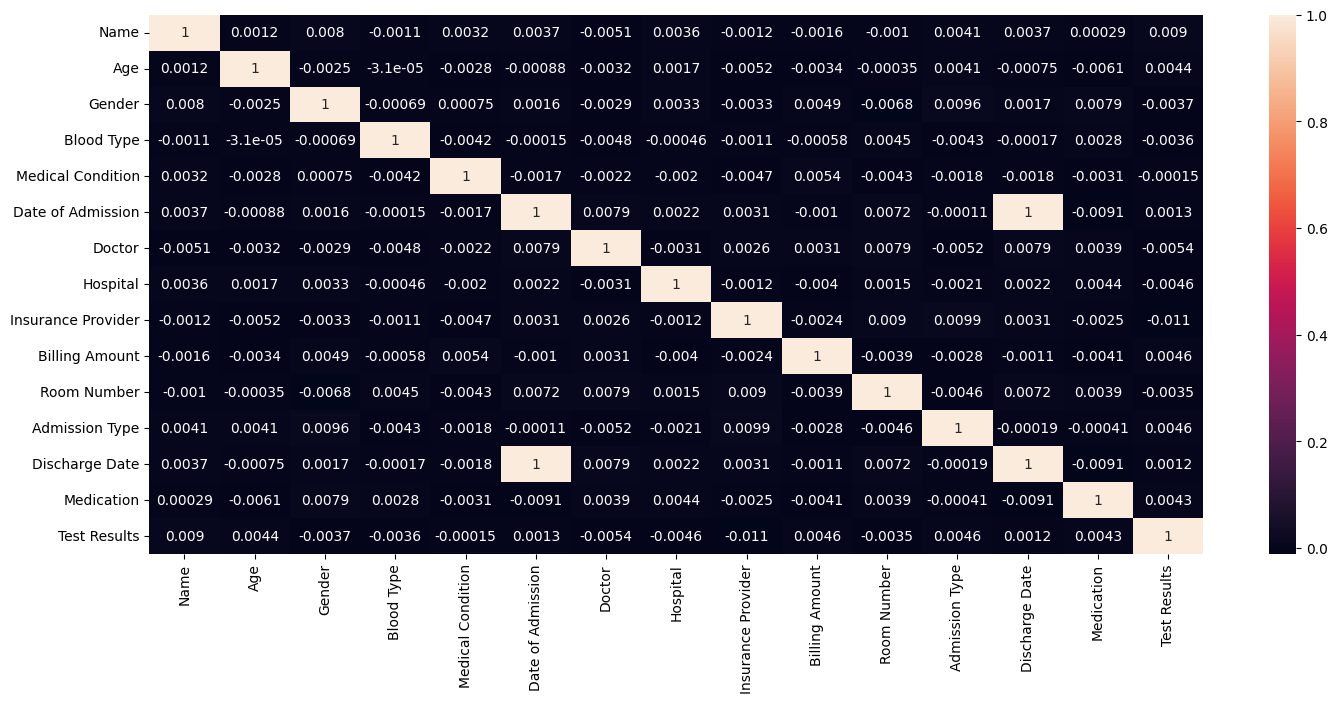

In [56]:
corr_matrix = df.corr(numeric_only=True)
fig,ax = plt.subplots(figsize=(17,7))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Random Forrest

In [57]:
##Splitting data into X & y

X = df.drop(columns=['Name', 'Date of Admission', 'Billing Amount', 'Discharge Date', 'Test Results'],axis=1)
y = df['Test Results']

In [58]:
# Do Label encoding on y label

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [59]:
# Import category encoder and perfom on X data

import category_encoders as ce
X = ce.TargetEncoder(smoothing=0).fit_transform(X,y)

In [60]:
#Train-test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(43972, 10) (10994, 10)


In [61]:
#Standarscaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
X_train.shape

(43972, 10)

In [63]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(class_weight='balanced', random_state=42)
random.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [64]:
pred_2 = random.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
acc = accuracy_score (y_test, pred_2)
print("Acc: %.2f%%" % (acc * 100.0))

Acc: 70.94%


## Binary Logistic Regression

Accuracy: 0.7016554484264144
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.97      0.81      7312
           1       0.74      0.17      0.28      3682

    accuracy                           0.70     10994
   macro avg       0.72      0.57      0.54     10994
weighted avg       0.71      0.70      0.63     10994

Confusion Matrix:
 [[7087  225]
 [3055  627]]
Predicted Test Result: 0


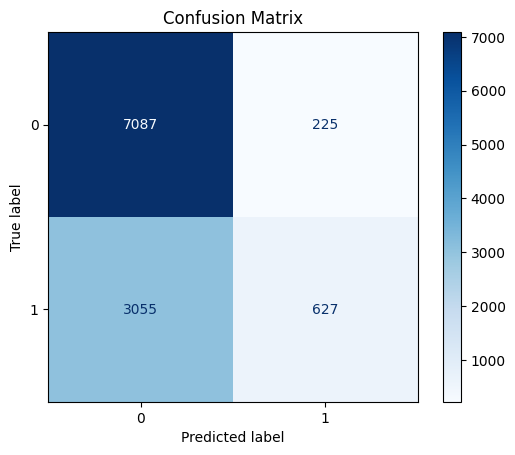

In [66]:
# Target variable: 'Test Results'
target = 'Test Results'

# Step 1: Preprocess the data
# Drop irrelevant columns (e.g., names, dates, billing amounts, room numbers)
irrelevant_columns = ['Name', 'Date of Admission', 'Billing Amount', 'Room Number', 'Discharge Date']
dataset = df.drop(columns=irrelevant_columns)

# Encode categorical variables
categorical_columns = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication']
encoder = LabelEncoder()
for col in categorical_columns:
    dataset[col] = encoder.fit_transform(dataset[col])

# Separate features and target variable
X = dataset.drop(columns=[target])
y = dataset[target]

# Encode the target variable
y = encoder.fit_transform(y)

# Normalize numerical columns (optional, depending on the model)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)

# Classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 5: Make predictions (example)
sample_input = X_test[0]  # Example: first row from test set
predicted_class = model.predict([sample_input])
predicted_label = encoder.inverse_transform(predicted_class)
print("Predicted Test Result:", predicted_label[0])

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [72]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Step 1: Load and prepare the data
# Assuming `data` is already loaded and "Test Results" column is updated.
# Convert "Test Results" to binary labels: "Evaluated" = 1, "Inconclusive" = 0
# df['Test Results Binary'] = df['Test Results'].map({'Evaluated': 1, 'Inconclusive': 0})

# Select relevant features (independent variables) and target (dependent variable)
# Drop unnecessary columns (modify based on your dataset)
X = df.drop(columns=['Test Results', 'Name', 'Discharge Date', 'Date of Admission'])

y = df['Test Results']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc)
print("Classification Report:\n", report)

# # Optional: Display feature importance (coefficients)
# coefficients = pd.DataFrame({
#     'Feature': X.columns,
#     'Coefficient': model.coef_[0]
# }).sort_values(by='Coefficient', ascending=False)
# print("Feature Importance:\n", coefficients)


Accuracy: 0.6650900491177005
ROC-AUC Score: 0.5029027830108506
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80      7312
           1       0.00      0.00      0.00      3682

    accuracy                           0.67     10994
   macro avg       0.33      0.50      0.40     10994
weighted avg       0.44      0.67      0.53     10994



/Users/winstonbudihartono/Desktop/MY-DAC-Curriculum/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/winstonbudihartono/Desktop/MY-DAC-Curriculum/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/winstonbudihartono/Desktop/MY-DAC-Curriculum/.venv/lib/python3.12/site-

##### Failed

In [34]:
X = df.drop(columns=['Name', 'Date of Admission', 'Billing Amount', 'Discharge Date', 'Test Results'],axis=1)
y = df['Test Results']

In [36]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,3068,30,1,5,2,1729,26612,29933,1,18856.281306,328,2,1730,3,0
1,15211,62,1,0,5,104,33648,16012,3,33643.327287,265,1,109,1,1
2,6476,76,0,1,5,1233,37828,5473,0,27955.096079,205,1,1247,0,0
3,26935,28,0,6,3,560,22511,12317,3,37909.782410,450,0,589,1,0
4,26241,43,0,2,2,1230,21259,33598,0,14238.317814,458,2,1249,4,0


In [35]:
# Split the data into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

ValueError: Found input variables with inconsistent numbers of samples: [569, 54966]

In [30]:
# regularization constant (strength)
REG_CONST = 0.01

# Create a model and fit it to the training data.
# C := inverse of regularization strength
model = LogisticRegression(penalty='l2', C=1./REG_CONST, max_iter=300)
model.fit(x_train_scaled, y_train)

# Predict the classes of test data and measure the accuracy of test data
y_pred = model.predict(x_test_scaled)
acc = (y_pred == y_test).mean()
print('\nAccuracy of test data = {:.3f}'.format(acc))


Accuracy of test data = 0.947


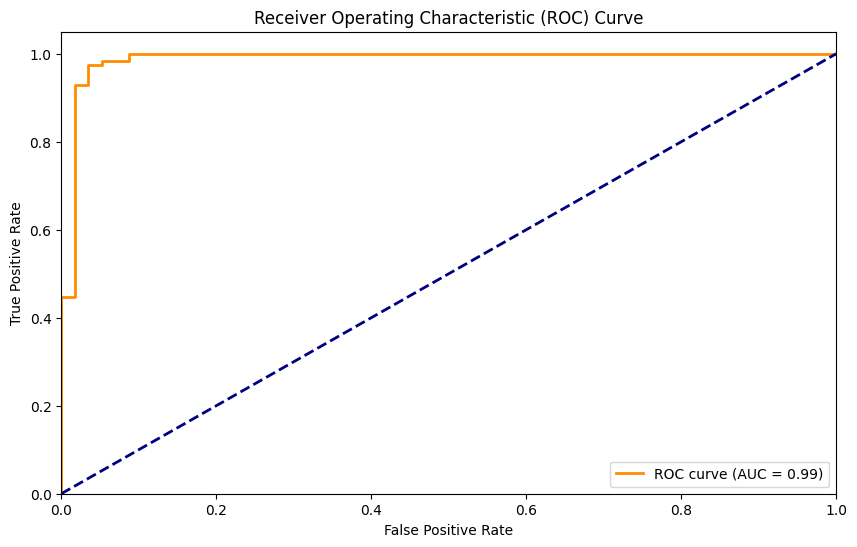

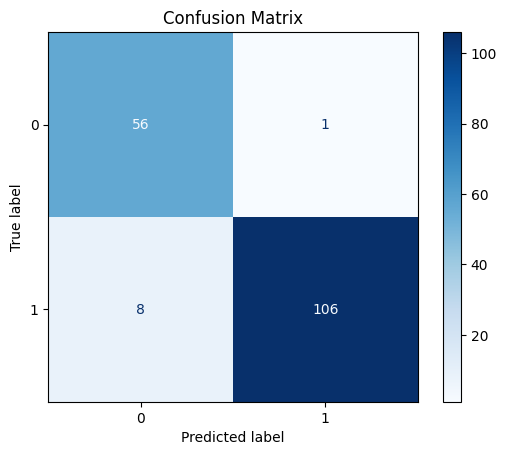

AUC Score: 0.988
F1 Score: 0.959

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        57
           1       0.99      0.93      0.96       114

    accuracy                           0.95       171
   macro avg       0.93      0.96      0.94       171
weighted avg       0.95      0.95      0.95       171



In [31]:
# Get prediction probabilities
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]


# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print AUC score
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))